In [39]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt



In [40]:
# Carregando o arquivo CSV
df = pd.read_csv('dados.csv')


In [41]:
# Padronizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [51]:
# Definindo o número de clusters (por exemplo, 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustando o modelo aos dados
kmeans.fit(df_scaled)

# Obtendo os rótulos de cluster para cada ponto
labels = kmeans.labels_

In [43]:
# Adicionando os rótulos de cluster ao dataframe original
df['Cluster'] = labels

# Visualizando os primeiros dados com os clusters
print(df.head())

   Qtd_Moradores  Maquina_de_Lavar_1  Geladeiras_1  Freezer_1  \
0            3.0                 0.0           1.0        0.0   
1            2.0                 0.0           1.0        1.0   
2            2.0                 0.0           1.0        0.0   
3            2.0                 1.0           1.0        1.0   
4            2.0                 1.0           1.0        1.0   

   Microcomputador  Lava_Loucas_1  Microondas_1  Ar_Condicionado  Televisao  \
0              0.0            0.0           0.0              0.0        1.0   
1              1.0            0.0           0.0              0.0        2.0   
2              0.0            0.0           0.0              0.0        1.0   
3              1.0            0.0           1.0              1.0        2.0   
4              1.0            0.0           1.0              0.0        2.0   

   Batedeira  ...  Aquecedor_de_Ambiente  Ventilador_de_Teto  \
0        1.0  ...                    0.0                 0.0   
1     

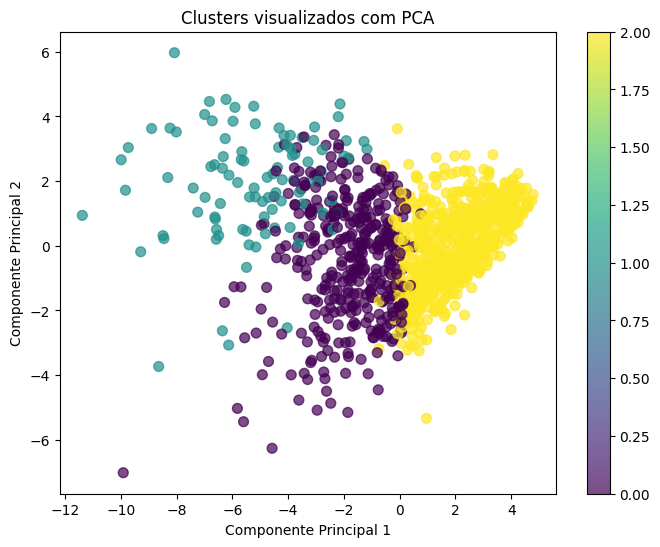

In [44]:
# Reduzindo os dados para 2 componentes principais
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plotando os clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters visualizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

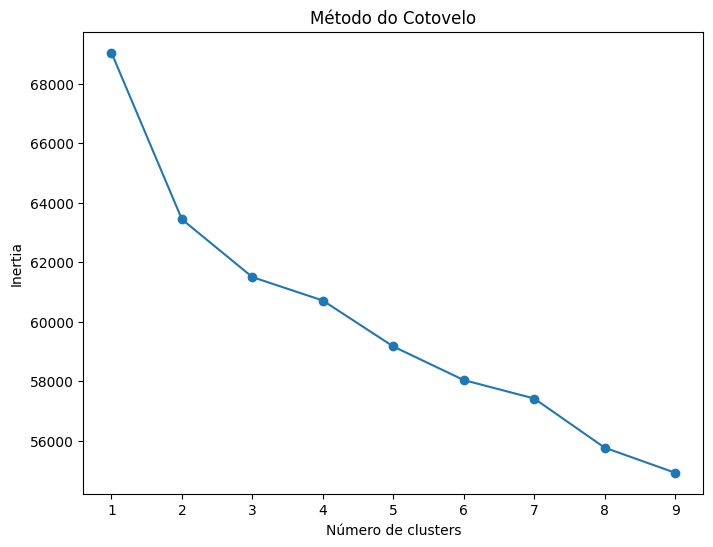

In [45]:
inertia = []
K_range = range(1, 10)

# Testando diferentes números de clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico de elbow
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.show()


In [46]:
# Adicionando os rótulos de cluster ao dataframe
df['Cluster'] = kmeans.labels_

In [52]:
# Contando as classes em cada cluster
class_count = df.groupby(['Cluster', 'CLASSE']).size().unstack(fill_value=0)

# Exibindo o resultado
print(class_count)


CLASSE    1   2   3    4    5    6
Cluster                           
0         1   5   6   11    3    1
1         8  11  24    9    0    0
2         0   1  42   73   50    1
3        10   8  15   12    2    0
4         6   5  18   10    1    0
5         0   0   2   15  104  170
6         0   0   2    1    0    0
7         2  23  87  122   94    4
8        13  22  54   40    8    0
